# Friedman's H statistic (h-stat)

Friedman's H statistic (h-stat) is a non-parametric test that provides a powerful window into complex machine learning models by helping to detect differences in treatments across multiple test attempts. Specifically, it assesses whether the models use interactions to make predictions, offering insights into the significance of ranked data distributions across different treatments.

In [20]:
# Install necessary libraries
!pip install -U pyartemis==0.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: pyartemis
    Found existing installation: pyartemis 0.1.5
    Uninstalling pyartemis-0.1.5:
      Successfully uninstalled pyartemis-0.1.5


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import RandomForestRegressor

from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod

df=pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv", )
df = df.drop('Unnamed: 0', axis=1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
X, y = df.drop('medv', axis=1), df['medv']
model = RandomForestRegressor()
model.fit(X, y)
model.score(X, y)

0.9847218835889376

In [3]:
# Calculate Friedman H statistic
# H statistic is expensive so we sample 100 random examples
sampled_X = X.sample(n=100, random_state=1)
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, sampled_X) 

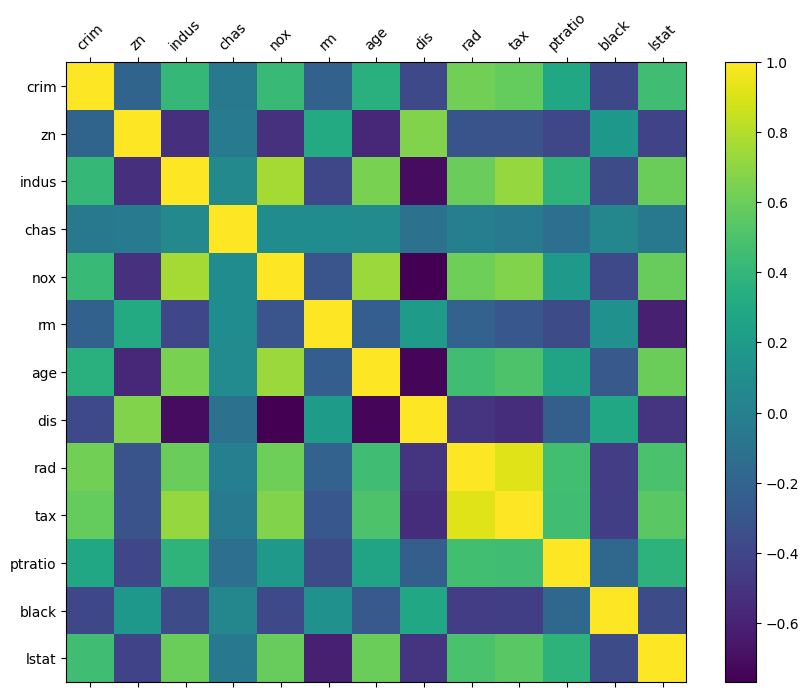

In [4]:
# H statistic is sensible to correlation so it is good to check the correlation
# Calculate the correlation matrix
corr = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

We can see here the impact on each feature, higher is in the plot, higher is the interaction of a feature

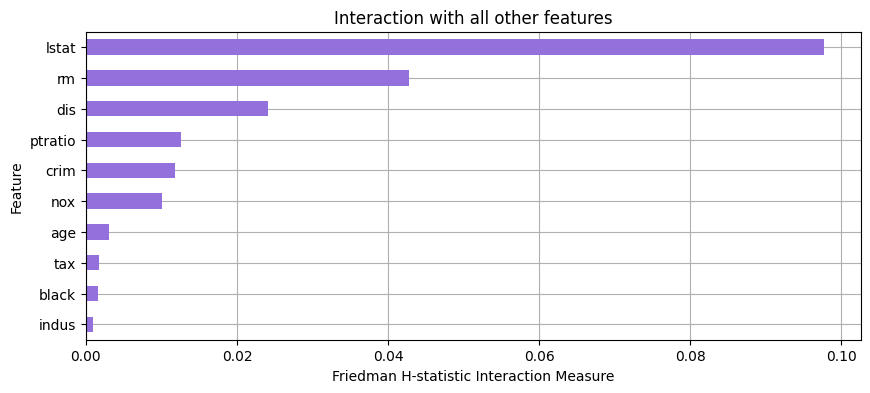

In [5]:
# Overall interaction plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

This plot is giving us information about the interactions of each feature

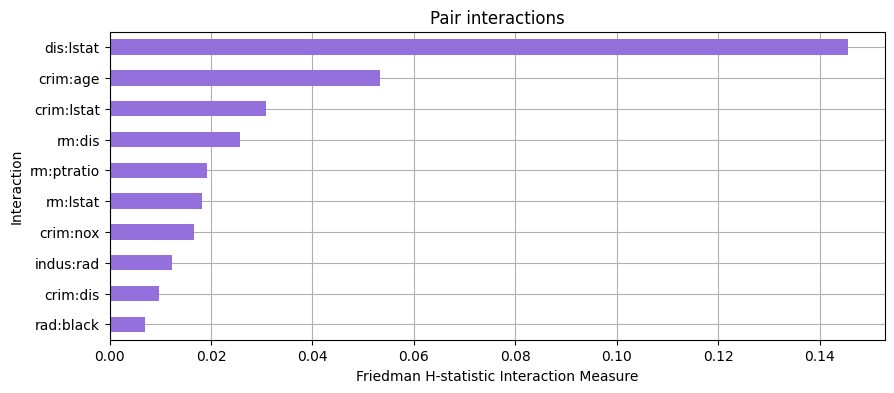

In [6]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)


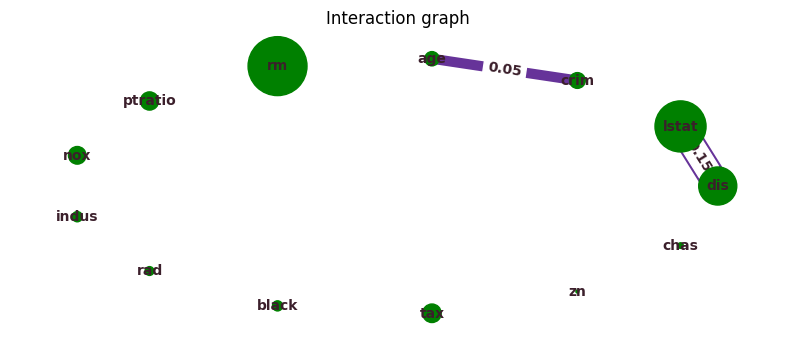

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('graph',ax=ax)

Here the heatmap of the interaction

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


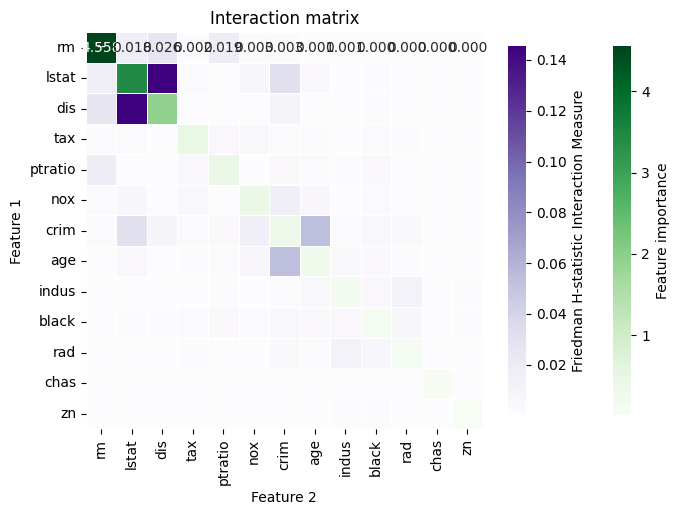

In [7]:
# Interaction heatmap
h_stat.plot()


/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


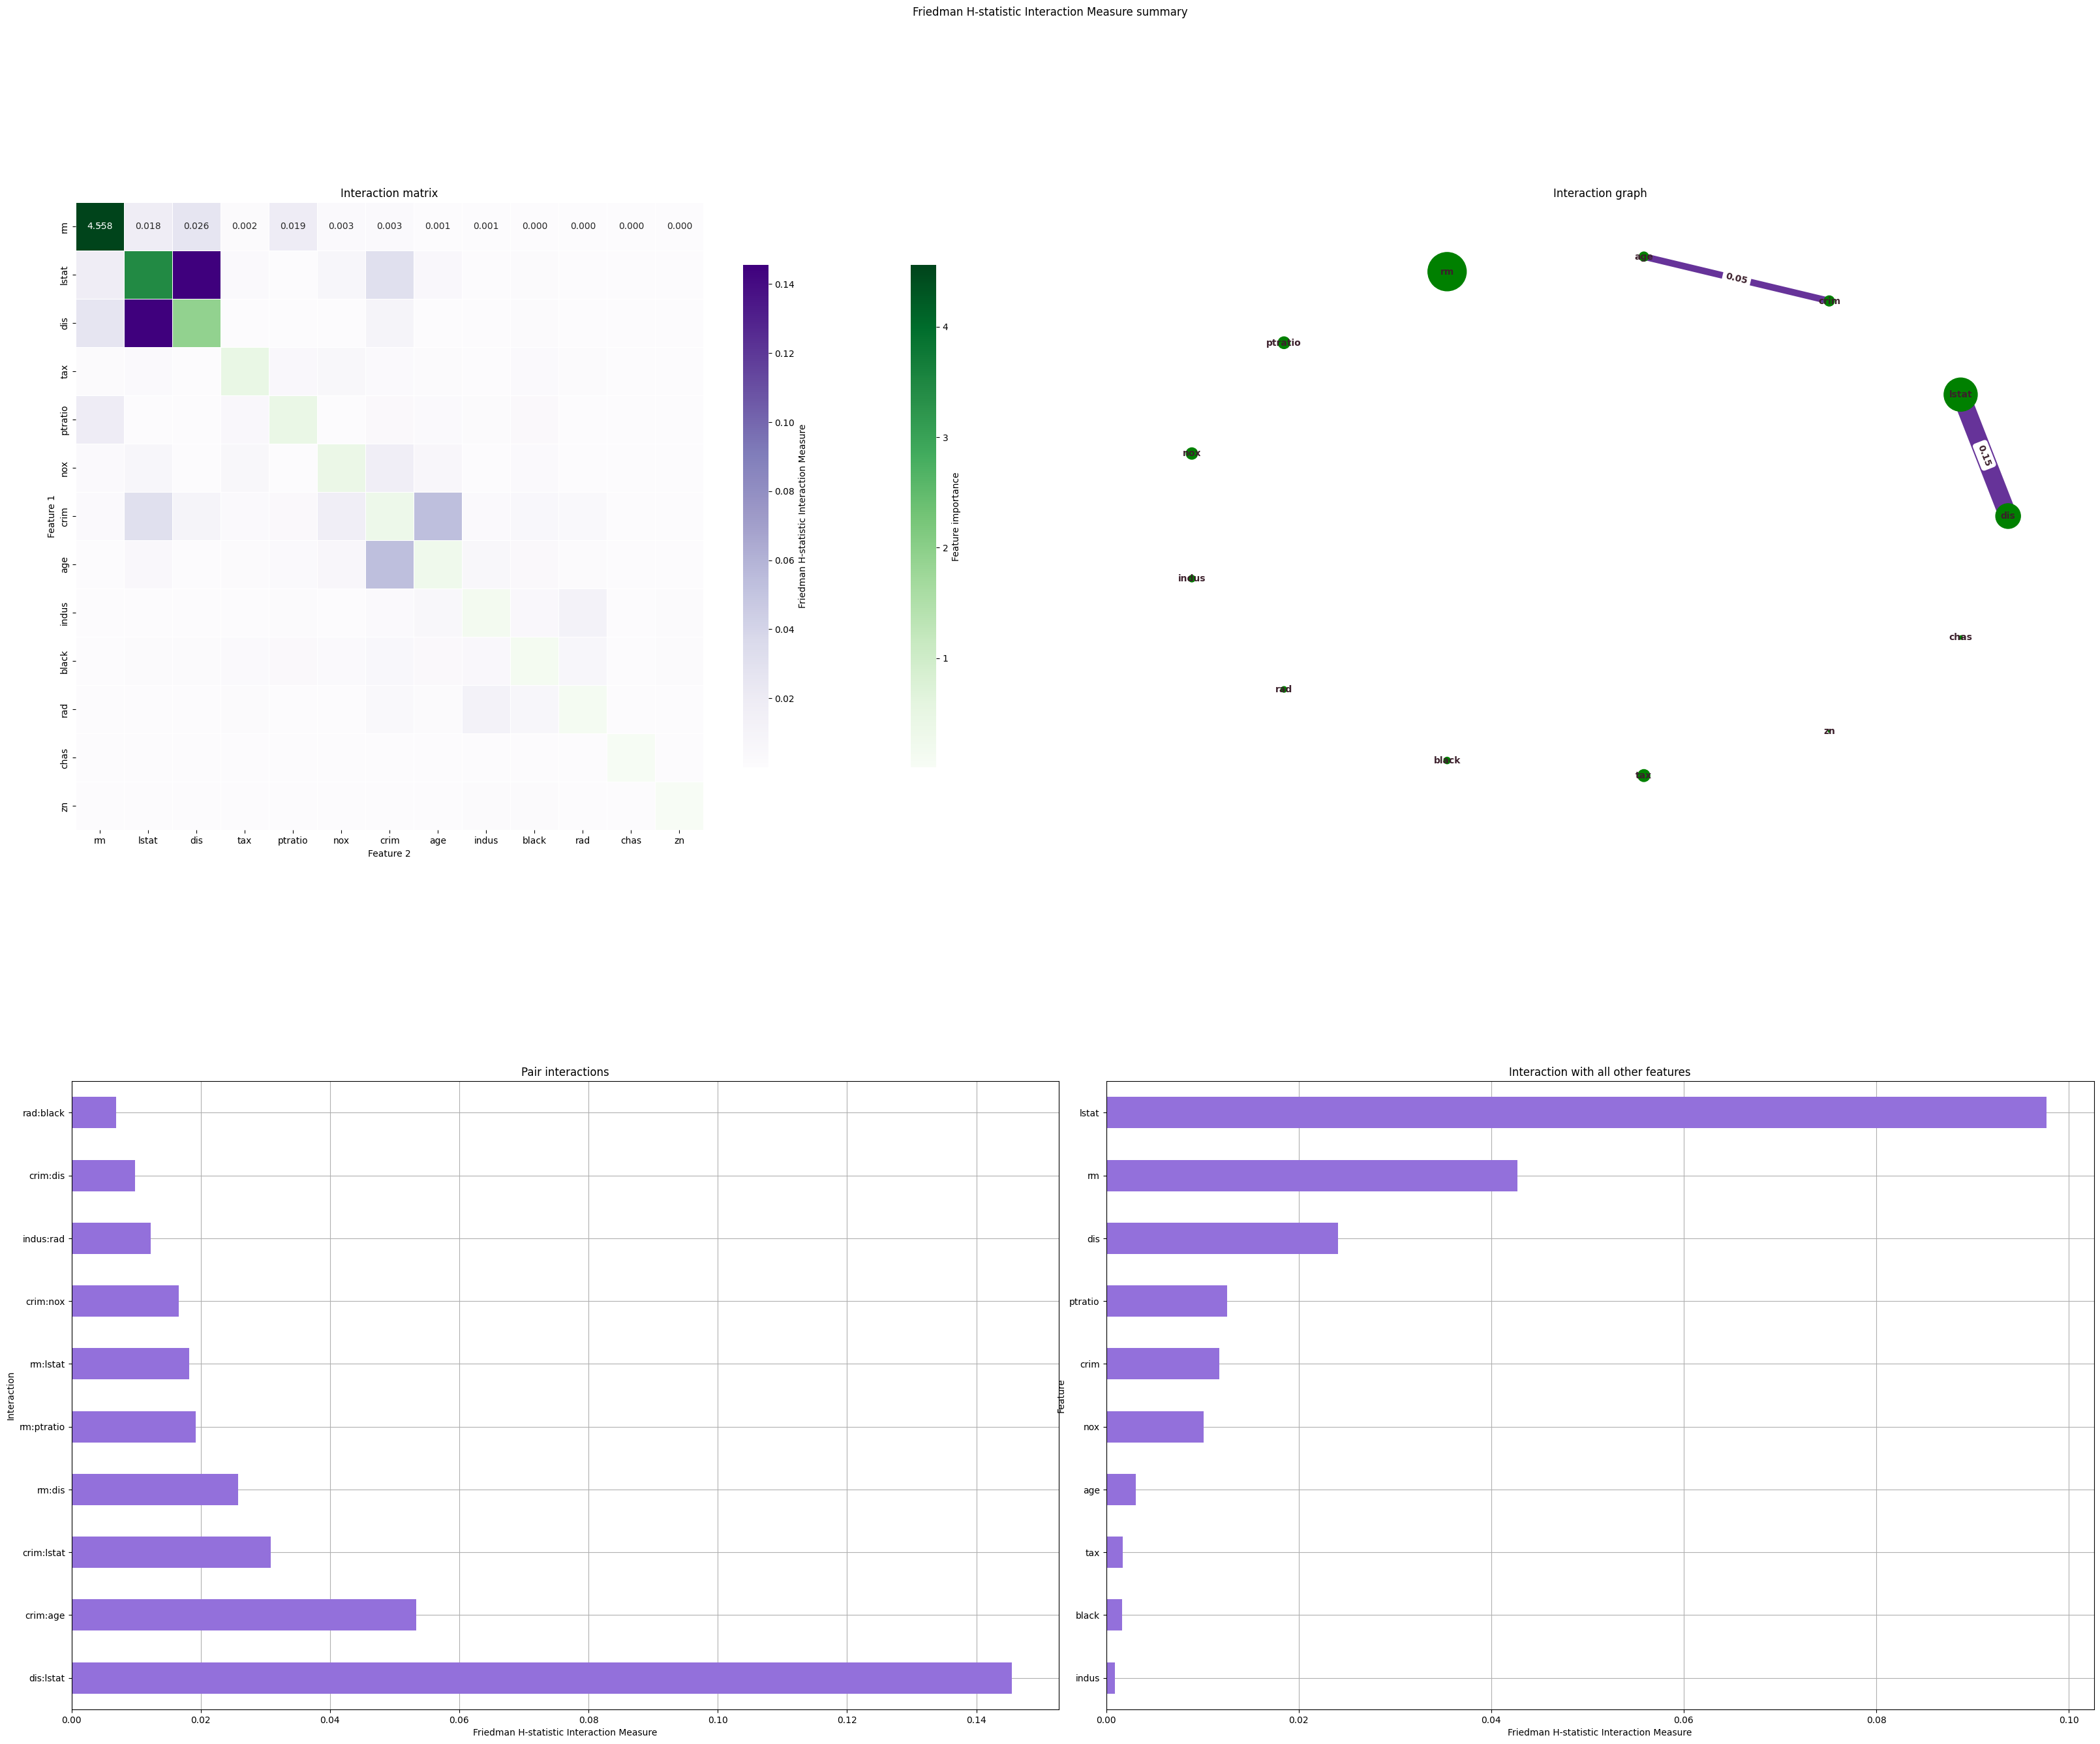

In [20]:
#this giving all the plots together
h_stat.plot('summary')

Normalization of H stat can lead to over-exageration of the interaction, we can then test also the unormalized interactions

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


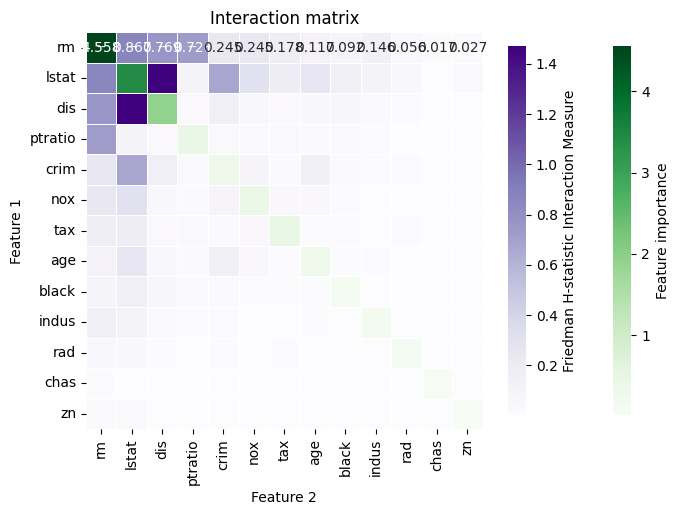

In [9]:
# not normalized version
h_stat_notnorm = FriedmanHStatisticMethod(normalized=False)
h_stat_notnorm.fit(model, sampled_X) 

h_stat_notnorm.plot()

Text(0, 0.5, '% lower status of the population')

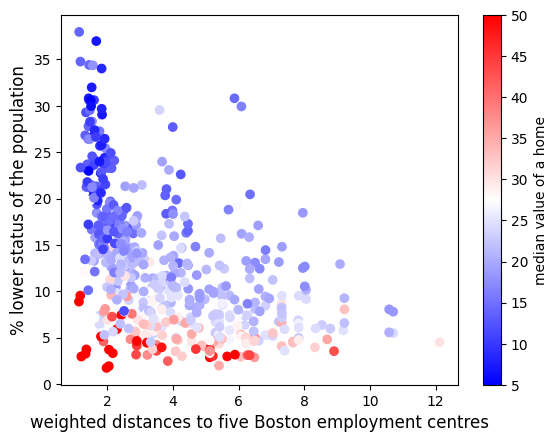

In [14]:
# we can check manually the interactions
plt.scatter(X["dis"], X["lstat"], c=y, cmap="bwr")
plt.colorbar(label="median value of a home")

plt.xlabel("weighted distances to five Boston employment centres", size=12)
plt.ylabel("% lower status of the population", size=12)

In [15]:
h_stat